# Ridge Regression Analysis

Ridge regression uses L2 regularization to prevent overfitting.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [8]:
# Generate dataset for Ridge regression
np.random.seed(123)
n_samples, n_features = 150, 15
X = np.random.randn(n_samples, n_features)
true_coef = np.random.randn(n_features) * 0.5
y = X @ true_coef + 0.2 * np.random.randn(n_samples)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)


## Why Ridge Regression?

Ridge regression addresses the problem of multicollinearity in linear regression by adding a penalty term to the loss function. This penalty shrinks the coefficients, reducing their variance and improving the model's generalization. Below, we will visualize the need for Ridge regression step by step.

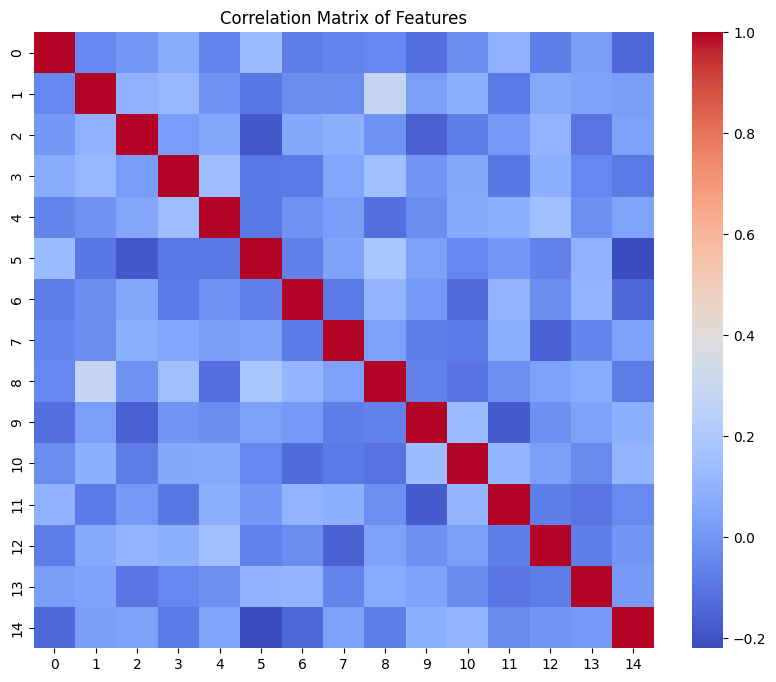

In [9]:
# Visualize multicollinearity
import seaborn as sns

# Compute correlation matrix
correlation_matrix = pd.DataFrame(X_scaled).corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Features')
plt.show()

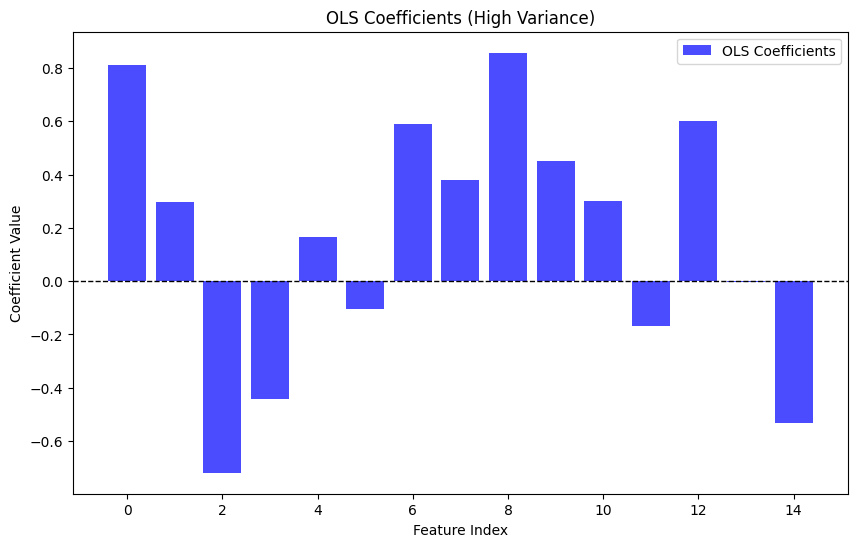

In [10]:
# Fit ordinary least squares regression
from sklearn.linear_model import LinearRegression

ols = LinearRegression()
ols.fit(X_train, y_train)

# Plot coefficients
plt.figure(figsize=(10, 6))
plt.bar(range(len(ols.coef_)), ols.coef_, color='blue', alpha=0.7, label='OLS Coefficients')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('OLS Coefficients (High Variance)')
plt.legend()
plt.show()

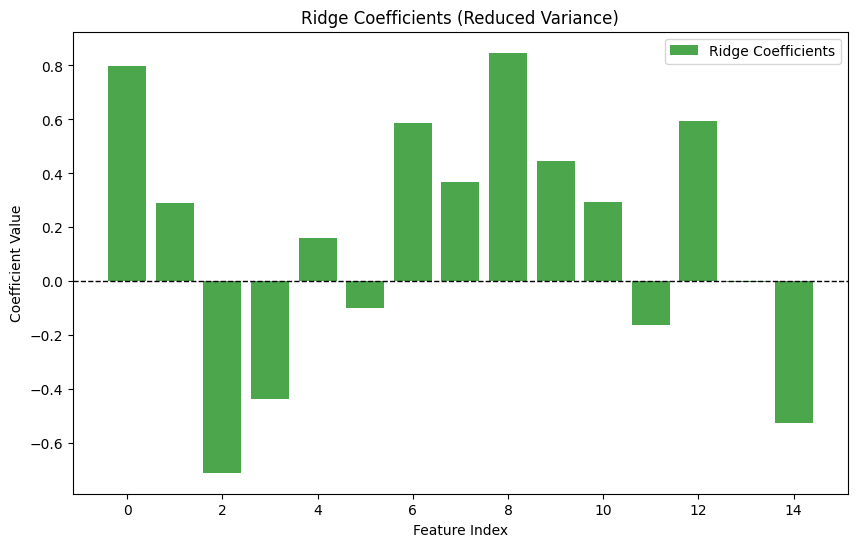

In [11]:
# Fit Ridge regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Plot Ridge coefficients
plt.figure(figsize=(10, 6))
plt.bar(range(len(ridge.coef_)), ridge.coef_, color='green', alpha=0.7, label='Ridge Coefficients')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Ridge Coefficients (Reduced Variance)')
plt.legend()
plt.show()